This notebook starts works for investigating strain spatial scales. 

This notebook firstly shows how to calculate __surface area strain transients__, for the *coarsest spatial level* at which to take area strains. 

In [1]:
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.metrics import mean_squared_error

In [25]:
def plot_surfaceareastrain_transient(dcm0Path, uacPath=None, trackingPath, save_fig=False,
                                     save_txt=False, regional=False):
    """
    This function plots surface area transient
    
    Inputs:
        * dcm0Path: path to dcm0 Fibres msh calculating strains wrt
        * uacPath: path to 2D UAC Fibres msh. [Only required for regional analysis]
        * trackingPath: motion tracking path with tracked meshes
        * save_fig: Bool. Set to True if want to save .png figure [default:False]
        * save_txt: Bool. Set to True if want to save data points [default:False]
        * regional: Bool. Set to True if want to perform regional analysis
    """
    
    ## Read in intial msh and corresponding UACs
    dcm0_msh = pv.read(dcm0Path)
    
    ## Omit PVs and LAA
    condition = dcm0_msh.cell_data["elemTag"] == 1.0
    inds_all = np.arange(0, dcm0_msh.number_of_cells)
    inds_LAbody = inds_all[condition]

    dcm0_LAonly = dcm0_msh.extract_cells(inds_LAbody)
    dcm0_LAonly = dcm0_LAonly.compute_cell_sizes(length=False, area=True, 
                              volume=False, progress_bar=False)

    dcm0_surface_area_xcl_PVs = dcm0_LAonly.cell_data['Area'].sum()
    
    surface_areas_xcl_PVs=np.zeros((9,))
    for i in range(1, 10):
        print(i)
        msh=pv.read(f"{trackingPath}/cLr-fibres-aligned-{i}.vtp")
        
        LAbody = msh.extract_cells(inds_LAbody)
        LAbody = LAbody.compute_cell_sizes(length=False, area=True, 
                              volume=False, progress_bar=False)

        surface_areas_xcl_PVs[i-1] = LAbody.cell_data['Area'].sum() 
    
    ## Extract strain transient
    strains = 100*(surface_areas_xcl_PVs - dcm0_surface_area_xcl_PVs)/dcm0_surface_area_xcl_PVs

    ## Add starting zero to strain transient
    zerod_strains = [0]
    zerod_strains.extend(strains)
    
    ## Plot strain transient
    fig, (ax1) = plt.subplots(1,1,figsize=(7,5), facecolor="white")

    plt.plot(np.arange(0,10), zerod_strains, linewidth=2)
    plt.grid(True)
    plt.title("Surface Area Strain")
    plt.ylabel("Area strain")
    plt.xlabel("Time (normalised)")

    ax1.label_outer()
    
#     print(zerod_strains)

    if save_txt:
        print("Saving data!")
        ## Save data points as txt file
        np.savetxt(f"{trackingPath}/surface_area_strains_excl_PVs.txt", zerod_strains)
    
    if save_fig:
        ## Save figure
        print("Saving fig!")
        fig.savefig(f"{trackingPath}/surface_area_strains_excl_PVs.png", dpi=200)

In [25]:
def plot_surfaceareastrain_transient_regional_WIP(dcm0Path, uacPath, 
                                                  trackingPath, save_fig=False, save_txt=False):
    """
    This function plots surface area transient
    
    Inputs:
        * dcm0Path: path to dcm0 Fibres msh calculating strains wrt
        * uacPath: path to 2D UAC Fibres msh. [Only required for regional analysis]
        * trackingPath: motion tracking path with tracked meshes
        * save_fig: Bool. Set to True if want to save .png figure [default:False]
        * save_txt: Bool. Set to True if want to save data points [default:False]
    """
    
    ## Read in intial msh and corresponding UACs
    dcm0_msh = pv.read(dcm0Path)
    uac_msh = pv.read(uacPath)
    
    ## Omit PVs and LAA
    condition = dcm0_msh.cell_data["elemTag"] == 1.0
    inds_all = np.arange(0, dcm0_msh.number_of_cells)
    inds_LAbody = inds_all[condition]

    dcm0_LAonly = dcm0_msh.extract_cells(inds_LAbody)
    dcm0_LAonly = dcm0_LAonly.compute_cell_sizes(length=False, area=True, 
                              volume=False, progress_bar=False)

    dcm0_surface_area_xcl_PVs = dcm0_LAonly.cell_data['Area'].sum()
    
    surface_areas_xcl_PVs=np.zeros((9,))
    for i in range(1, 10):
        print(i)
        msh=pv.read(f"{trackingPath}/cLr-fibres-aligned-{i}.vtp")
        
        LAbody = msh.extract_cells(inds_LAbody)
        LAbody = LAbody.compute_cell_sizes(length=False, area=True, 
                              volume=False, progress_bar=False)

        surface_areas_xcl_PVs[i-1] = LAbody.cell_data['Area'].sum() 
    
    ## Extract strain transient
    strains = 100*(surface_areas_xcl_PVs - dcm0_surface_area_xcl_PVs)/dcm0_surface_area_xcl_PVs

    ## Add starting zero to strain transient
    zerod_strains = [0]
    zerod_strains.extend(strains)
    
    ## Plot strain transient
    fig, (ax1) = plt.subplots(1,1,figsize=(7,5), facecolor="white")

    plt.plot(np.arange(0,10), zerod_strains, linewidth=2)
    plt.grid(True)
    plt.title("Surface Area Strain")
    plt.ylabel("Area strain")
    plt.xlabel("Time (normalised)")

    ax1.label_outer()
    
#     print(zerod_strains)

    if save_txt:
        print("Saving data!")
        ## Save data points as txt file
        np.savetxt(f"{trackingPath}/surface_area_strains_excl_PVs.txt", zerod_strains)
    
    if save_fig:
        ## Save figure
        print("Saving fig!")
        fig.savefig(f"{trackingPath}/surface_area_strains_excl_PVs.png", dpi=200)

In [2]:
## Read in dcm0 Fibres mesh which strains will be calculated wrt

dcm0Path="/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/dcm0/Fibres_HaoSeg/clean-Labelled-refined.vtk"
dcm0_msh = pv.read(dcm0Path)

In [3]:
## Read in all tracked meshes and store their surface areas

trackingPath=f"/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9"

surface_areas=np.zeros((9,))

for i in range(1, 10):
    print(i)
    msh=pv.read(f"{trackingPath}/cLr-fibres-aligned-{i}.vtp")
    surface_areas[i-1] = msh.area 

1
2
3
4
5
6
7
8
9


In [4]:
## Extract strains 
strains = 100*(surface_areas - dcm0_msh.area)/dcm0_msh.area

## Add starting zero to strain transient
zerod_strains = [0]
zerod_strains.extend(strains)

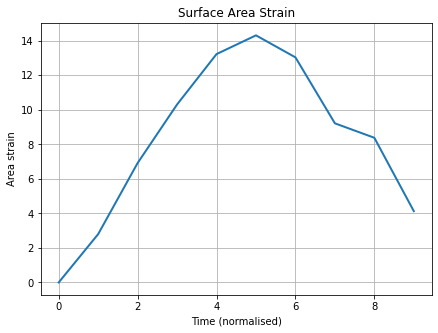

In [6]:
## Plot strain transient

## Saves fig and data points

fig, (ax1) = plt.subplots(1,1,figsize=(7,5), facecolor="white")

plt.plot(np.arange(0,10), zerod_strains, linewidth=2)
plt.grid(True)
plt.title("Surface Area Strain")
plt.ylabel("Area strain")
plt.xlabel("Time (normalised)")

ax1.label_outer()

## Save data points as txt file
# np.savetxt(f"{trackingPath}/surface_area_strains.txt", zerod_strains)

## Save figure
# fig.savefig(f"{trackingPath}/surface_area_strains.png", dpi=200)

In [8]:
## Read in data points and calculate rmse between gross surface area strain
## and mean strains using finest res msh points

surface_area_strains = np.loadtxt(f"{trackingPath}/surface_area_strains.txt")
avg_finest_strains = np.loadtxt(f"{trackingPath}/area_meanstrains_global.txt")

rmse = mean_squared_error(avg_finest_strains, surface_area_strains, squared=False)
rmse

0.1104853596978656

## For removing PVs and LAA

In [9]:
## All in 1 cell
## Finding surface area of LA body label only 

condition = dcm0_msh.cell_data["elemTag"] == 1.0

inds_all = np.arange(0, dcm0_msh.number_of_cells)
inds_LAbody = inds_all[condition]

LAbody_dcm0 = dcm0_msh.extract_cells(inds_LAbody)

LAbody_dcm0 = LAbody_dcm0.compute_cell_sizes(length=False, area=True, 
                          volume=False, progress_bar=False)

dcm0_surface_area_xcl_PVs = LAbody_dcm0.cell_data['Area'].sum()

/home/csi20/anaconda3/envs/vtk/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


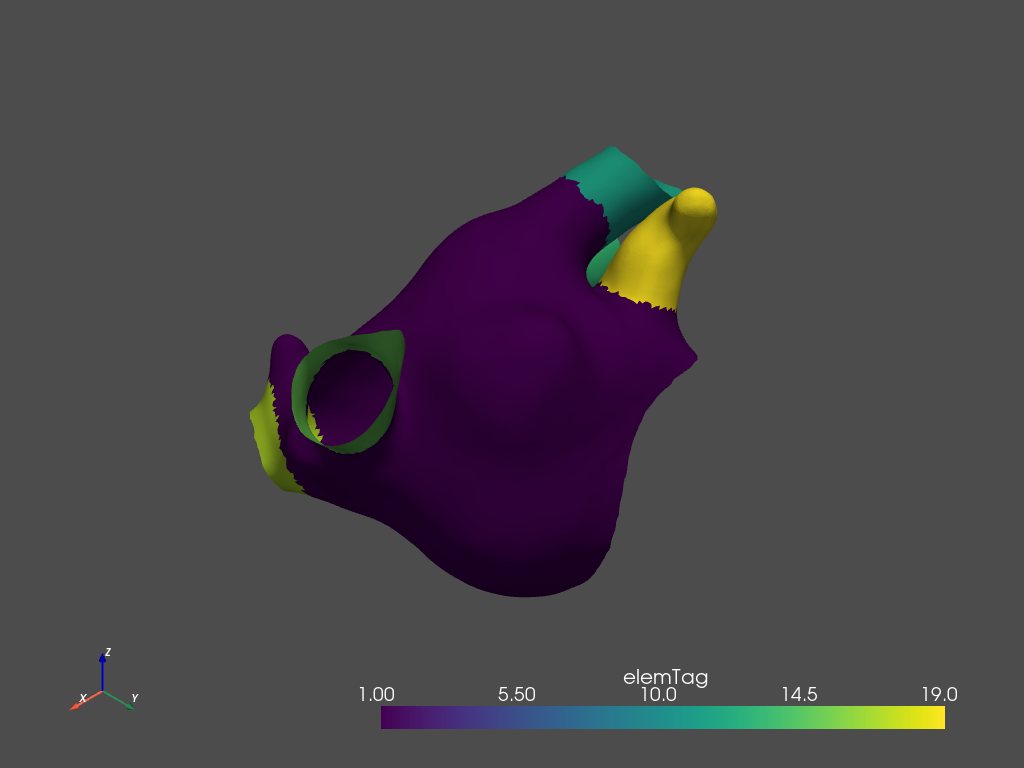

In [10]:
## Visual check for removal of LAA and PVs
dcm0_msh.plot()

/home/csi20/anaconda3/envs/vtk/lib/python3.9/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


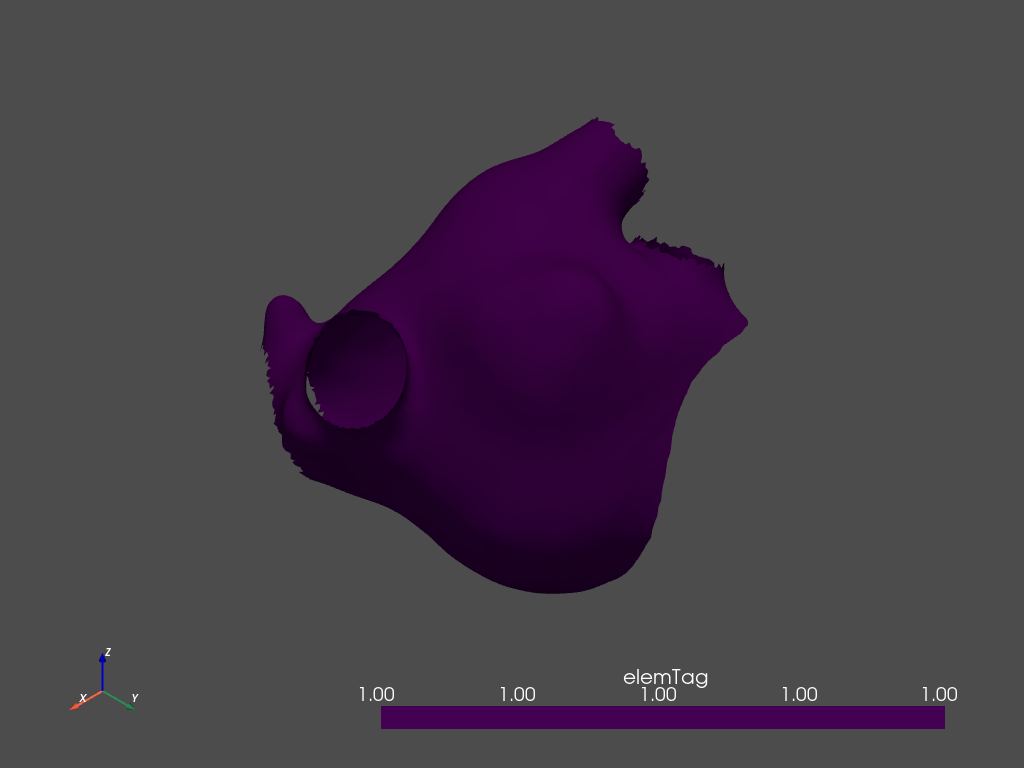

In [12]:
LAbody_dcm0.plot()

In [13]:
## Read in all meshes and store their total surface areas 
## This time omitting the PVs and LAA

surface_areas_xcl_PVs=np.zeros((9,))

for i in range(1, 10):
    ##
    print(i)
    msh=pv.read(f"{trackingPath}/cLr-fibres-aligned-{i}.vtp")

    LAbody = msh.extract_cells(inds_LAbody)
    LAbody = LAbody.compute_cell_sizes(length=False, area=True, 
                          volume=False, progress_bar=False)
    
    surface_areas_xcl_PVs[i-1] = LAbody.cell_data['Area'].sum() 

1
2
3
4
5
6
7
8
9


In [14]:
## Copmute strains

strains = 100*(surface_areas_xcl_PVs - dcm0_surface_area_xcl_PVs)/dcm0_surface_area_xcl_PVs

## Add initial zero to strain transients

zerod_strains = [0]
zerod_strains.extend(strains)

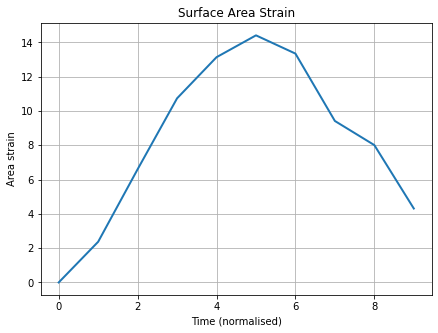

In [15]:
## Plot and save (Fig and Data points) strain transients 

fig, (ax1) = plt.subplots(1,1,figsize=(7,5), facecolor="white")

plt.plot(np.arange(0,10), zerod_strains, linewidth=2)
plt.grid(True)
plt.title("Surface Area Strain")
plt.ylabel("Area strain")
plt.xlabel("Time (normalised)")

ax1.label_outer()

## Save data points as txt file
# np.savetxt(f"{trackingPath}/surface_area_strains_excl_PVs.txt", zerod_strains)

## Save figure
# fig.savefig(f"{trackingPath}/surface_area_strains_excl_PVs.png", dpi=200)

In [16]:
## Read in data points and calculate rmse
## between gross surface area strain transients and finest res msh 
## avg strain transients
## Omitting PVs and LAA

surface_area_strains = np.loadtxt(f"{trackingPath}/surface_area_strains_excl_PVs.txt")
avg_finest_strains = np.loadtxt(f"{trackingPath}/area_meanstrains_global_excl_PVs.txt")

rmse = mean_squared_error(avg_finest_strains, surface_area_strains, squared=False)
rmse

0.1736422502635597

In [18]:
trackingPath

'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9'

1
2
3
4
5
6
7
8
9
Saving data!
Saving fig!


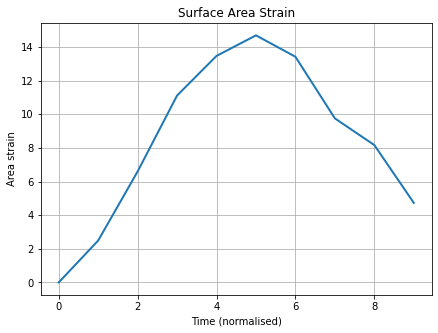

In [26]:
plot_surfaceareastrain_transient(dcm0Path=dcm0Path, 
                                 trackingPath='/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9/veri',
                                 save_fig=True, save_txt=True)

In [27]:
trackingPath

'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9'

## RMSE between GT and Trk Msh

In [28]:
## Compare GT and measured surface area transients

GT_strains = np.loadtxt(f"{trackingPath}/surface_area_strains_excl_PVs.txt")
Trk_strains = np.loadtxt(f"{trackingPath}/veri/surface_area_strains_excl_PVs.txt")

rmse = mean_squared_error(GT_strains, Trk_strains, squared=False)
rmse

0.25487312695924613

## Regional LA Body Analysis 

In [30]:
trackingPath

'/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9'

1
1
2
3
4
5
2
1
2
3
4
5
3
1
2
3
4
5
4
1
2
3
4
5
5
1
2
3
4
5
6
1
2
3
4
5
7
1
2
3
4
5
8
1
2
3
4
5
9
1
2
3
4
5


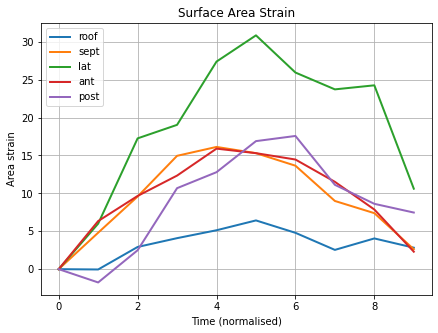

In [39]:
dcm0Path="/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/dcm0/Fibres_HaoSeg/clean-Labelled-refined.vtk"
uacPath="/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/dcm0/Fibres_HaoSeg/LCoords_2D_R_v3_C-regional_labels.vtk"
trackingPath='/home/csi20/Dropbox/phd/Data/RG_CT_Cases/CT-CRT/case02/MT-HiRes/SW-0.0-BE-1e-9'
save_txt=False
save_fig=False
region=2.0

## Read in intial msh and corresponding UACs
dcm0_msh = pv.read(dcm0Path)
uac_msh = pv.read(uacPath)

dcm0_msh = dcm0_msh.compute_cell_sizes(length=False, area=True, 
                          volume=False, progress_bar=False)

## Extract region labels
## Incorporates exclusion of LAA and PVs
region_label_ar = np.array(uac_msh.cell_data['region_label_v2'])

##

dcm0_surface_area=np.zeros((5, 9))
trk_surface_area=np.zeros((5, 9))
for i in range(1, 10): ## iterating through tracked meshes
    print(i)
    msh=pv.read(f"{trackingPath}/cLr-fibres-aligned-{i}.vtp")
    msh=msh.compute_cell_sizes(length=False, area=True, 
                              volume=False, progress_bar=False)
    
    for j in range(1, 6): ## regions
#         print(j)
        region_condition = uac_msh.cell_data['region_label_v2']==j
        
        dcm0_cellareas = dcm0_msh.cell_data['Area'][region_condition]
        msh_cell_areas = msh.cell_data['Area'][region_condition]

        trk_surface_area[j-1, i-1] = msh_cell_areas.sum()
        dcm0_surface_area[j-1, i-1] = dcm0_cellareas.sum()

## Extract strain transient
strains = 100*(trk_surface_area - dcm0_surface_area)/dcm0_surface_area

## Add starting zero to strain transient
zerod_strains1 = [0]
zerod_strains2 = [0]
zerod_strains3 = [0]
zerod_strains4 = [0]
zerod_strains5 = [0]
zerod_strains1.extend(strains[0, :])
zerod_strains2.extend(strains[1, :])
zerod_strains3.extend(strains[2, :])
zerod_strains4.extend(strains[3, :])
zerod_strains5.extend(strains[4, :])

## Plot strain transient
fig, (ax1) = plt.subplots(1,1,figsize=(7,5), facecolor="white")

plt.plot(np.arange(0,10), zerod_strains1, label='roof', linewidth=2)
plt.plot(np.arange(0,10), zerod_strains2, label='sept', linewidth=2)
plt.plot(np.arange(0,10), zerod_strains3, label='lat', linewidth=2)
plt.plot(np.arange(0,10), zerod_strains4, label='ant', linewidth=2)
plt.plot(np.arange(0,10), zerod_strains5, label='post', linewidth=2)

plt.grid(True)
plt.title("Surface Area Strain")
plt.ylabel("Area strain")
plt.xlabel("Time (normalised)")
plt.legend()

ax1.label_outer()

if save_txt:
    print("Saving data!")
    ## Save data points as txt file
    np.savetxt(f"{trackingPath}/surface_area_strains_regional_excl_PVs.txt", zerod_strains)

if save_fig:
    ## Save figure
    print("Saving fig!")
    fig.savefig(f"{trackingPath}/surface_area_strains_regional_excl_PVs.png", dpi=200)